<a href="https://colab.research.google.com/github/NajdekMonika/Diabetes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diabetes 130-US hospitals for years 1999-2008 Dataset


## Data Importing

In [22]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import scipy
from sklearn import metrics
import math
import missingno as msno
from sklearn.preprocessing import StandardScaler

In [23]:
!git clone https://github.com/NajdekMonika/Diabetes

fatal: destination path 'Diabetes' already exists and is not an empty directory.


In [ ]:
%ls Diabetes/Diabetes-130-US/

diabetic_data.csv  IDS_mapping.csv


In [24]:
df = pd.read_csv("Diabetes/Diabetes-130-US/diabetic_data.csv")

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
df_copy = df.copy()

##Data Wrangling

###Missing values

**Medical Specialty**

In [ ]:
df['medical_specialty'].value_counts()*100/len(df)

?                                49.082208
InternalMedicine                 14.381031
Emergency/Trauma                  7.433720
Family/GeneralPractice            7.310890
Cardiology                        5.259124
                                   ...    
SportsMedicine                    0.000983
Speech                            0.000983
Perinatology                      0.000983
Neurophysiology                   0.000983
Pediatrics-InfectiousDiseases     0.000983
Name: medical_specialty, Length: 73, dtype: float64

Percentage of null values in medical_specialty column is less than 50%, so there is no need to drop the entire column.

In [ ]:
df['diag_3'].value_counts()*100/len(df)

250     11.354480
401      8.145157
276      5.085195
428      4.497573
427      3.886367
          ...    
657      0.000983
684      0.000983
603      0.000983
E826     0.000983
971      0.000983
Name: diag_3, Length: 789, dtype: float64

**Payer Code**

In [ ]:
df['payer_code'].value_counts()*100/len(df)

?     39.557416
MC    31.876069
HM     6.165124
SP     4.920111
BC     4.574219
MD     3.470707
CP     2.489043
UN     2.405519
CM     1.903386
OG     1.015074
PO     0.581727
DM     0.539473
CH     0.143466
WC     0.132657
OT     0.093351
MP     0.077629
SI     0.054046
FR     0.000983
Name: payer_code, dtype: float64

Percentage of null values in payer_code column is less than 50%, so there is no need to drop the entire column.

**Weight**

In [12]:
df['weight'].value_counts()*100/len(df)

?            96.858479
[75-100)      1.312816
[50-75)       0.881434
[100-125)     0.614154
[125-150)     0.142484
[25-50)       0.095317
[0-25)        0.047167
[150-175)     0.034393
[175-200)     0.010809
>200          0.002948
Name: weight, dtype: float64

Percentage of null values in weight column is more than 50%, so there is a need to drop the entire column.

In [ ]:
df.drop(['weight'], axis=1)

In [ ]:
df['diag_1'].unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '250.6', '618', '182', '845', '423', '808', '250.4', '722', '403',
       '250.11', '784', '707', '440', '151', '715', '997', '198', '564',
       '812', '38', '590', '556', '578', '250.32', '433', 'V58', '569',
       '185', '536', '255', '250.13', '599', '558', '574', '491', '560',
       '244', '250.03', '577', '730', '188', '824', '250.8', '332', '562',
       '291', '296', '510', '401', '263', '438', '70', '250.02', '493',
       '642', '625', '571', '738', '593', '250.42', '807', '456', '446',
       '575', '250.41', '820', '515', '780', '250.22', '995', '235',
       '250.82', '721', '787', '162', '724', '282', '514', 'V55', '281',
       '250.33', '530', '466', '435', '250.12', 'V53', '789', '

In [ ]:
df = df.replace(['?', 'Unknown/Invalid'], np.NaN)

In [ ]:
df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
nan_col = df.columns[df.isna().any()].tolist()
nan_col

['race',
 'gender',
 'weight',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3']

<Axes: >

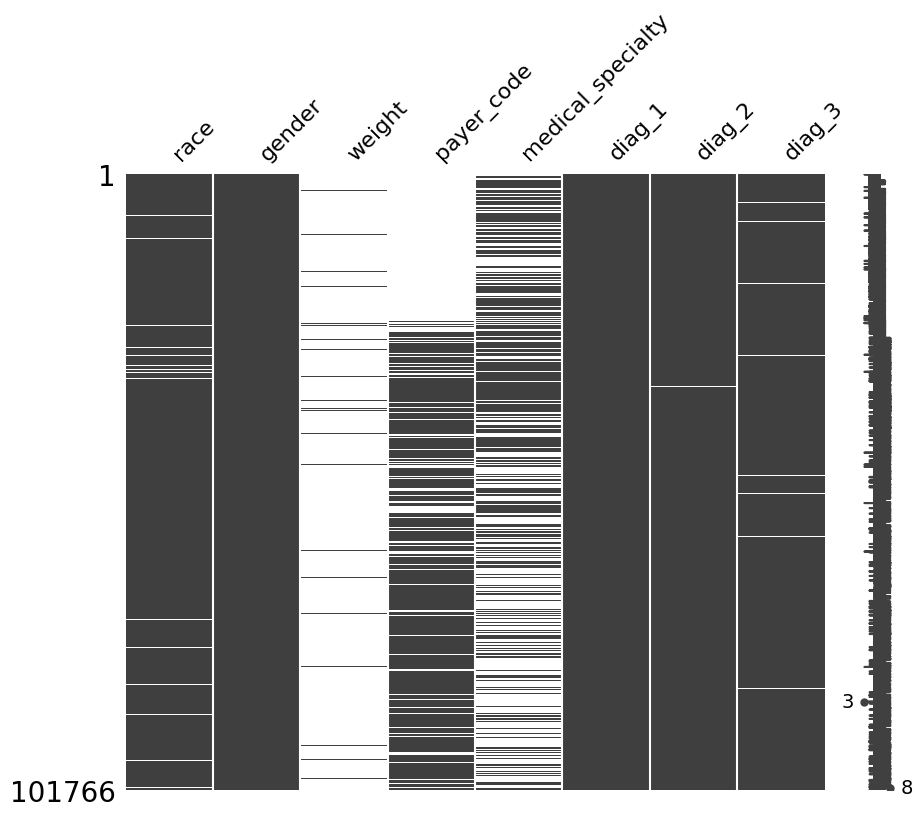

In [ ]:
nan_df = df[nan_col]
msno.matrix(nan_df, figsize=(10, 8))

<Axes: >

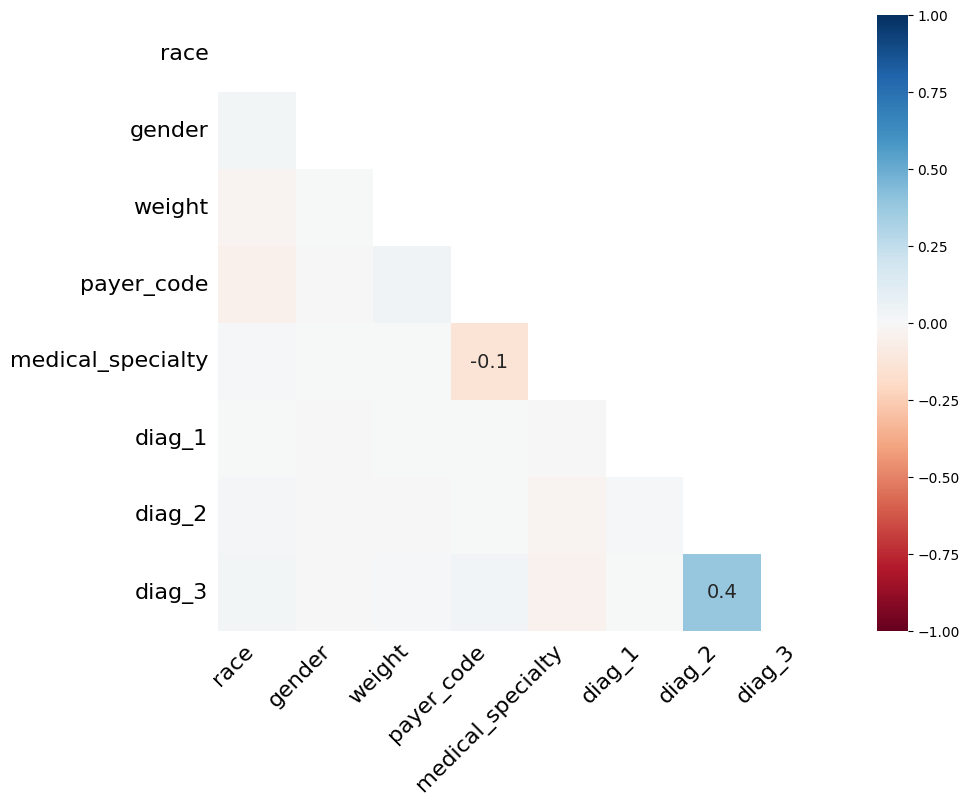

In [ ]:
msno.heatmap(nan_df, figsize=(10, 8))

In [ ]:
df = df.replace({
            'admission_type_id' : {5 : df['admission_type_id'].value_counts().idxmax(), 6 : df['admission_type_id'].value_counts().idxmax(), 8 : df['admission_type_id'].value_counts().idxmax()},
            'discharge_disposition_id' : {18 : df['discharge_disposition_id'].value_counts().idxmax(), 25 : df['discharge_disposition_id'].value_counts().idxmax(), 26 : df['discharge_disposition_id'].value_counts().idxmax()},
            'admission_source_id' : {9 : df['admission_source_id'].value_counts().idxmax(), 15 : df['admission_source_id'].value_counts().idxmax(), 17 : df['admission_source_id'].value_counts().idxmax()}
           },
           inplace=True)

In [ ]:
df = df.fillna(value = {'diag_1' : df['diag_1'].value_counts().idxmax(),
            'diag_2' : df['diag_2'].value_counts().idxmax(),
            'diag_3' : df['diag_3'].value_counts().idxmax(),
            'medical_specialty': df['medical_specialty'].value_counts().index.tolist()[1],
            'payer_code' : df['payer_code'].value_counts().index.tolist()[1],
            'race' : df['diag_3'].value_counts().idxmax()})

##Exploratory Data Analysis

###Categorical features




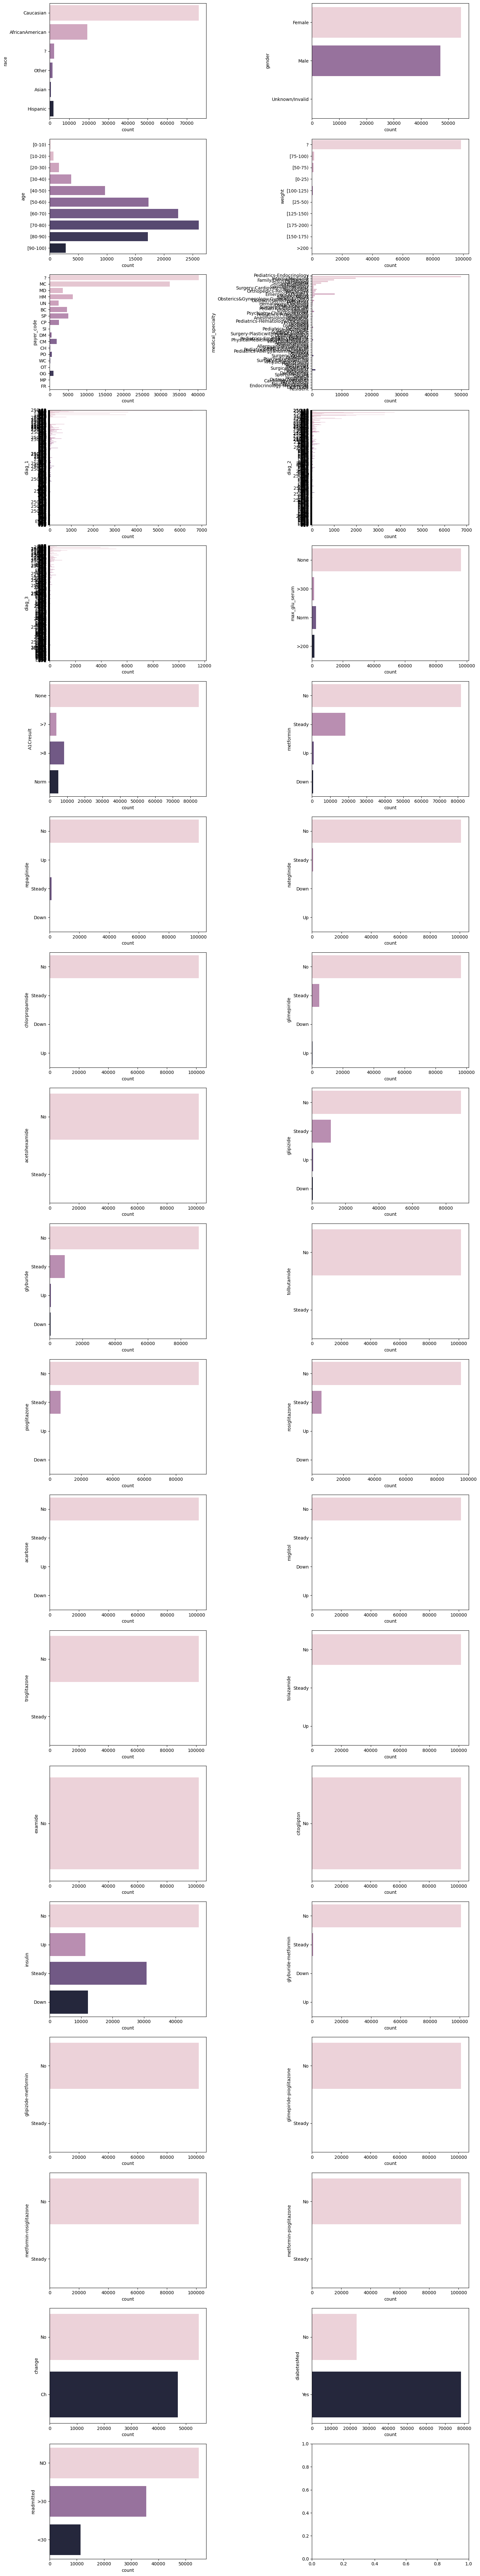

In [17]:
object_columns = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(nrows=19, ncols=2, figsize=(15, 80))

for i, column in enumerate(object_columns):
    row_id = math.floor(i/2)
    col_id = i % 2
    sns.countplot(data=df, y=column, ax=axes[row_id, col_id], palette = 'ch:-.24')

plt.tight_layout()
plt.show()

There are several sparse features. We can handle them if model accuracy will be low. Categorical features are divided into ordinal and nominal features. We need to encode nominal features and map ordinal features into numbers.

In [ ]:
df.drop(columns=['examide', 'citoglipton'], inplace=True)

**Nominal features**
* race
* gender
* admission_type_id
* discharge_disposition_id
* admission_source_id
* payer_code
* medical_specialty
* diag_1
* diag_2
* diag_3

In [35]:
nominal_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']

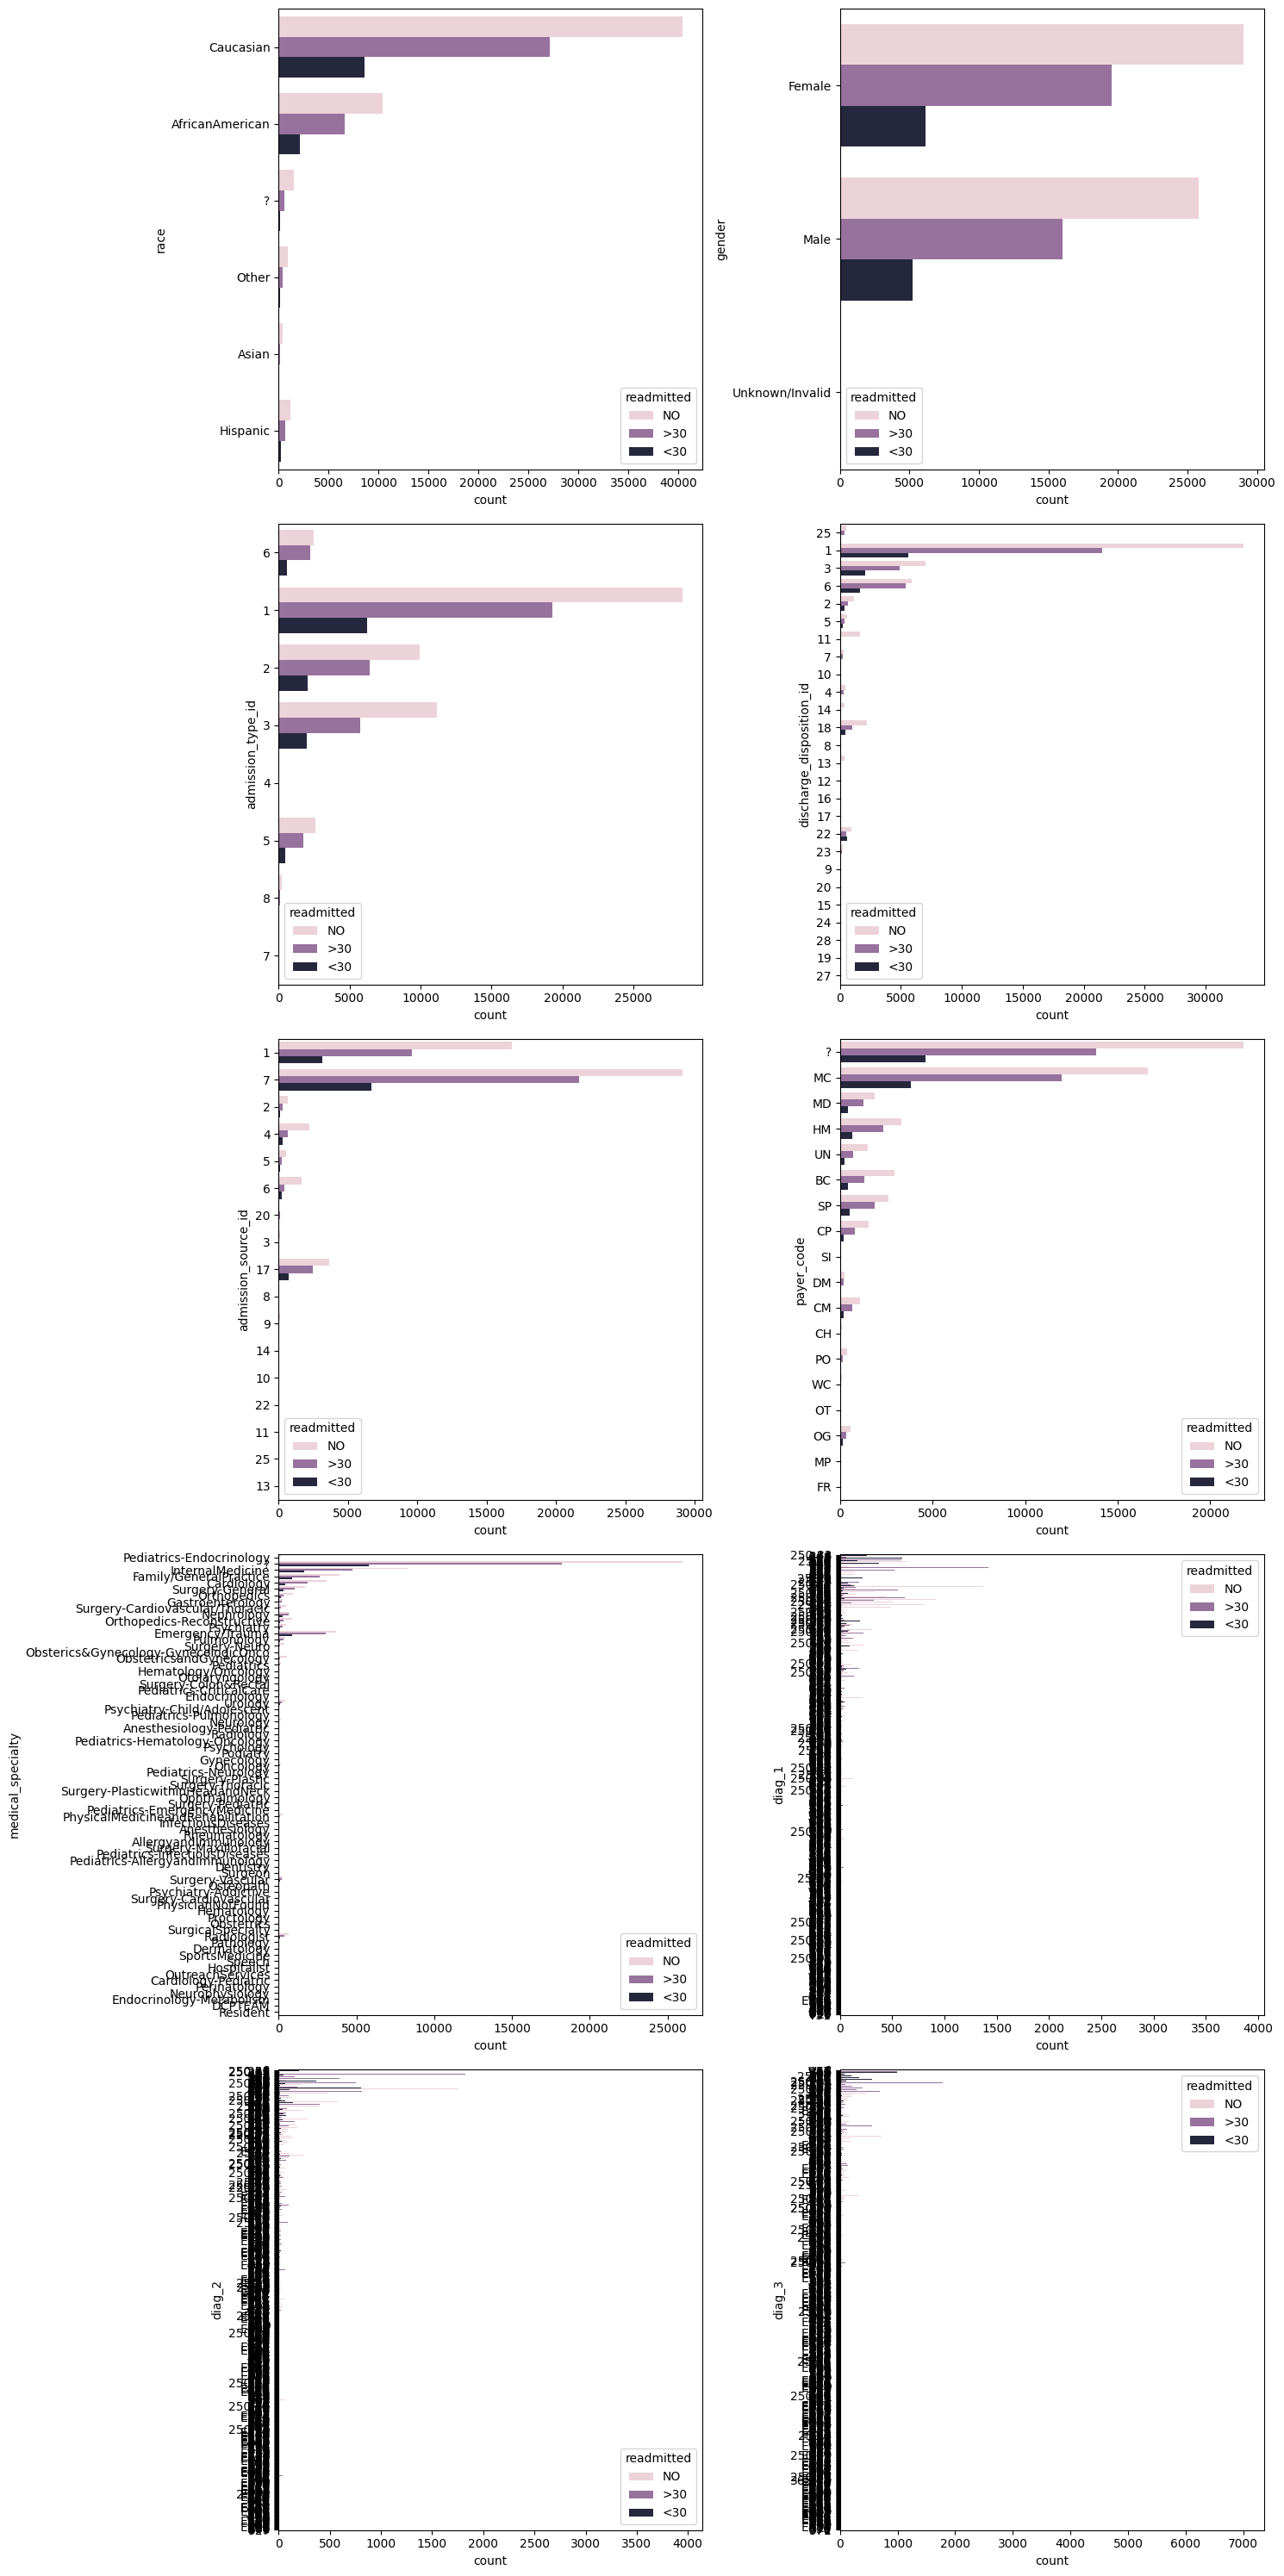

In [37]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (15, 30))

for i, column in enumerate(nominal_cols):
    row_id = math.floor(i/2)
    col_id = i % 2
    sns.countplot(data = df, y = column, hue = 'readmitted', ax = axes[row_id, col_id], palette = 'ch:-.24')

plt.tight_layout()
plt.show()

In [ ]:
df = df.replace({
            'admission_type_id' : {2 : 1, 7 : 1},
            'discharge_disposition_id' : {6 : 1, 8 : 1, 13 : 1, 19 : 11, 20 : 11, 21 : 11, 17 : 16, 10 : 16, 12 : 16, 23 : 2, 24 : 2, 22: 2, 3 : 2, 4 : 2, 5 : 2, 14 : 2, 15 : 2},
            'admission_source_id' : {2 : 1, 3 : 1, 12 : 11, 13 : 11, 14 : 11, 2 : 1, 3 : 1, 5 : 4, 6 : 4, 6 : 4, 24 : 4, 25 : 4, 22 : 11, 23 : 11, 17 : 4}
           },
           inplace=True)

In [31]:
df = df.astype({'admission_type_id': str, 'discharge_disposition_id': str, 'admission_source_id' : str})

In [ ]:
df.loc[(df['diag_1'].str.contains('V')) | (df['diag_1'].str.contains('E')), 'diag_1'] = 'Injury'
df.loc[(df['diag_2'].str.contains('V')) | (df['diag_2'].str.contains('E')),'diag_2'] = 'Injury'
df.loc[(df['diag_3'].str.contains('V')) | (df['diag_3'].str.contains('E')), 'diag_3'] = 'Injury'

In [ ]:
transformations = {
    (1, 140) : 'Infectious',
    (140, 240) : 'Neoplasms',
    (240, 280) : 'Endocrine',
    (280, 290) : 'Blood',
    (290, 320) : 'Mental',
    (320, 390) : 'Nervous',
    (390, 460) : 'Circulatory',
    (460, 520) : 'Respiratory',
    (520, 580) : 'Digestive',
    (580, 630) : 'Genitourinary',
    (630, 680) : 'Pregnancy',
    (680, 710) : 'Skin',
    (710, 740) : 'Musculoskeletal',
    (740, 760) : 'Congenital',
    (760, 780) : 'Perinatal',
    (780, 800) : 'Symptoms',
    (800, 1000) : 'Injury'
}

In [ ]:
def transform_value(value):
    for (start, end), new_value in transformations.items():
        if start <= value < end:
            return new_value
    return value

In [ ]:
df['diag_1'] = df['diag_1'].apply(transform_value)
df['diag_2'] = df['diag_2'].apply(transform_value)
df['diag_3'] = df['diag_3'].apply(transform_value)

**Ordinal features**

* age
* max_glu_serum
* A1Cresult
* metformin, ..., metformin.pioglitazone
* change
* diabetesMed
* readmitted



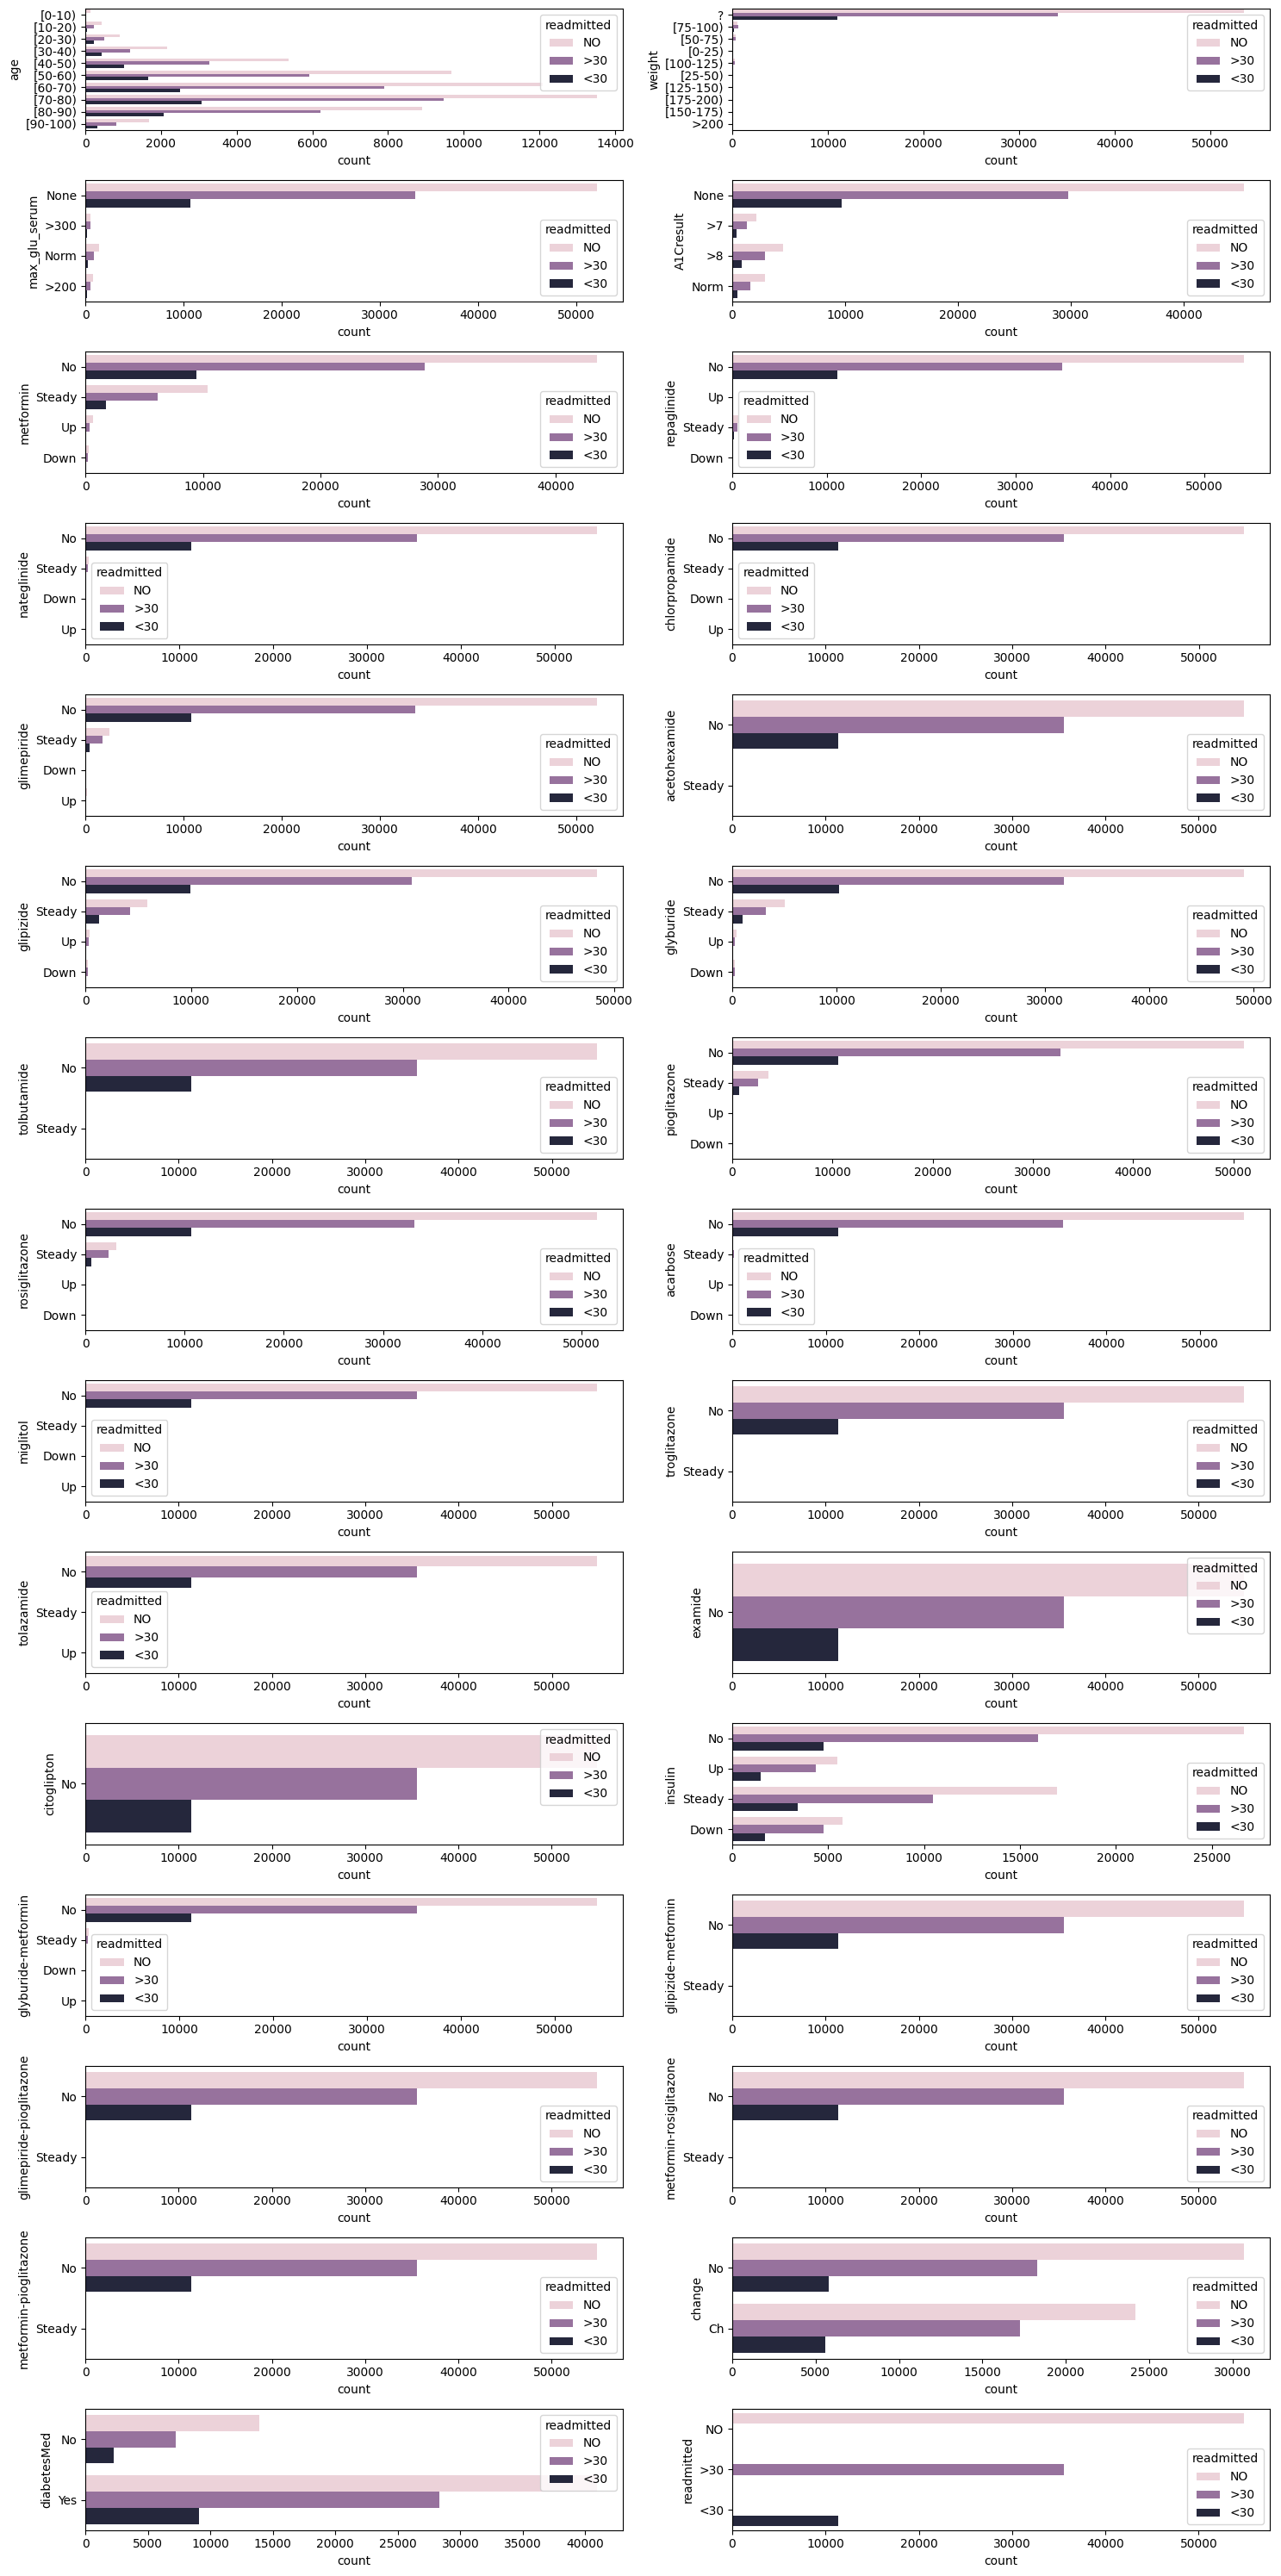

In [41]:
df_no_nominal = df.drop(nominal_cols, axis=1)
ordinal_columns = df_no_nominal.select_dtypes(include = ['object']).columns
fig, axes = plt.subplots(nrows = 15, ncols = 2, figsize = (15, 30))

for i, column in enumerate(ordinal_columns):
    row_id = math.floor(i/2)
    col_id = i % 2
    sns.countplot(data = df_no_nominal, y = column, hue = 'readmitted', ax = axes[row_id, col_id], palette = 'ch:-.24')

plt.tight_layout()
plt.show()

In [ ]:
drug_map = {'no' : 0, 'down' : 1, 'steady' : 2, 'up' : 3}
drug_columns = list(df.columns)[24:47]

readmitted_map = {'NO' : 0, '>30' : 1, '<30' : 2}

diabetesMed_map = {'No' : 0, 'Yes' : 1}

change_map = {'No' : 0, 'Ch' : 1}

A1Cresult_map = {'None' : 0, 'Norm' : 1, '>7' : 2, '>8' : 3}

max_glu_serum_map = {'None' : 0, 'Norm' : 1, '>200' : 2, '>300' : 3}

# age_map = {'[0-10)' : 0, '[10-20)' : 1, '[20-30)' : 2, '[30-40)' : 3, '[40-50)' : 4, '[50-60)' : 5,
#        '[60-70)' : 6, '[70-80)' : 7, '[80-90)' : 8, '[90-100)' : 9}

In [ ]:
for column in drug_columns:
  df[column] = df[column].map(drug_map)
df['readmitted'] = df['readmitted'].map(readmitted_map)
df['diabetesMed'] = df['diabetesMed'].map(diabetesMed_map)
df['change'] = df['change'].map(change_map)
df['A1Cresult'] = df['A1Cresult'].map(A1Cresult_map)
df['max_glu_serum'] = df['max_glu_serum'].map(max_glu_serum_map)
# df['age'] = df['age'].map(age_map)

In [ ]:
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)

###Numerical features

**Integer features**
* time_in_hospital
* num_lab_procedures
* num_procedures
* num_medications
* number_outpatient
* number_emergency
* number_inpatient
* number_diagnoses


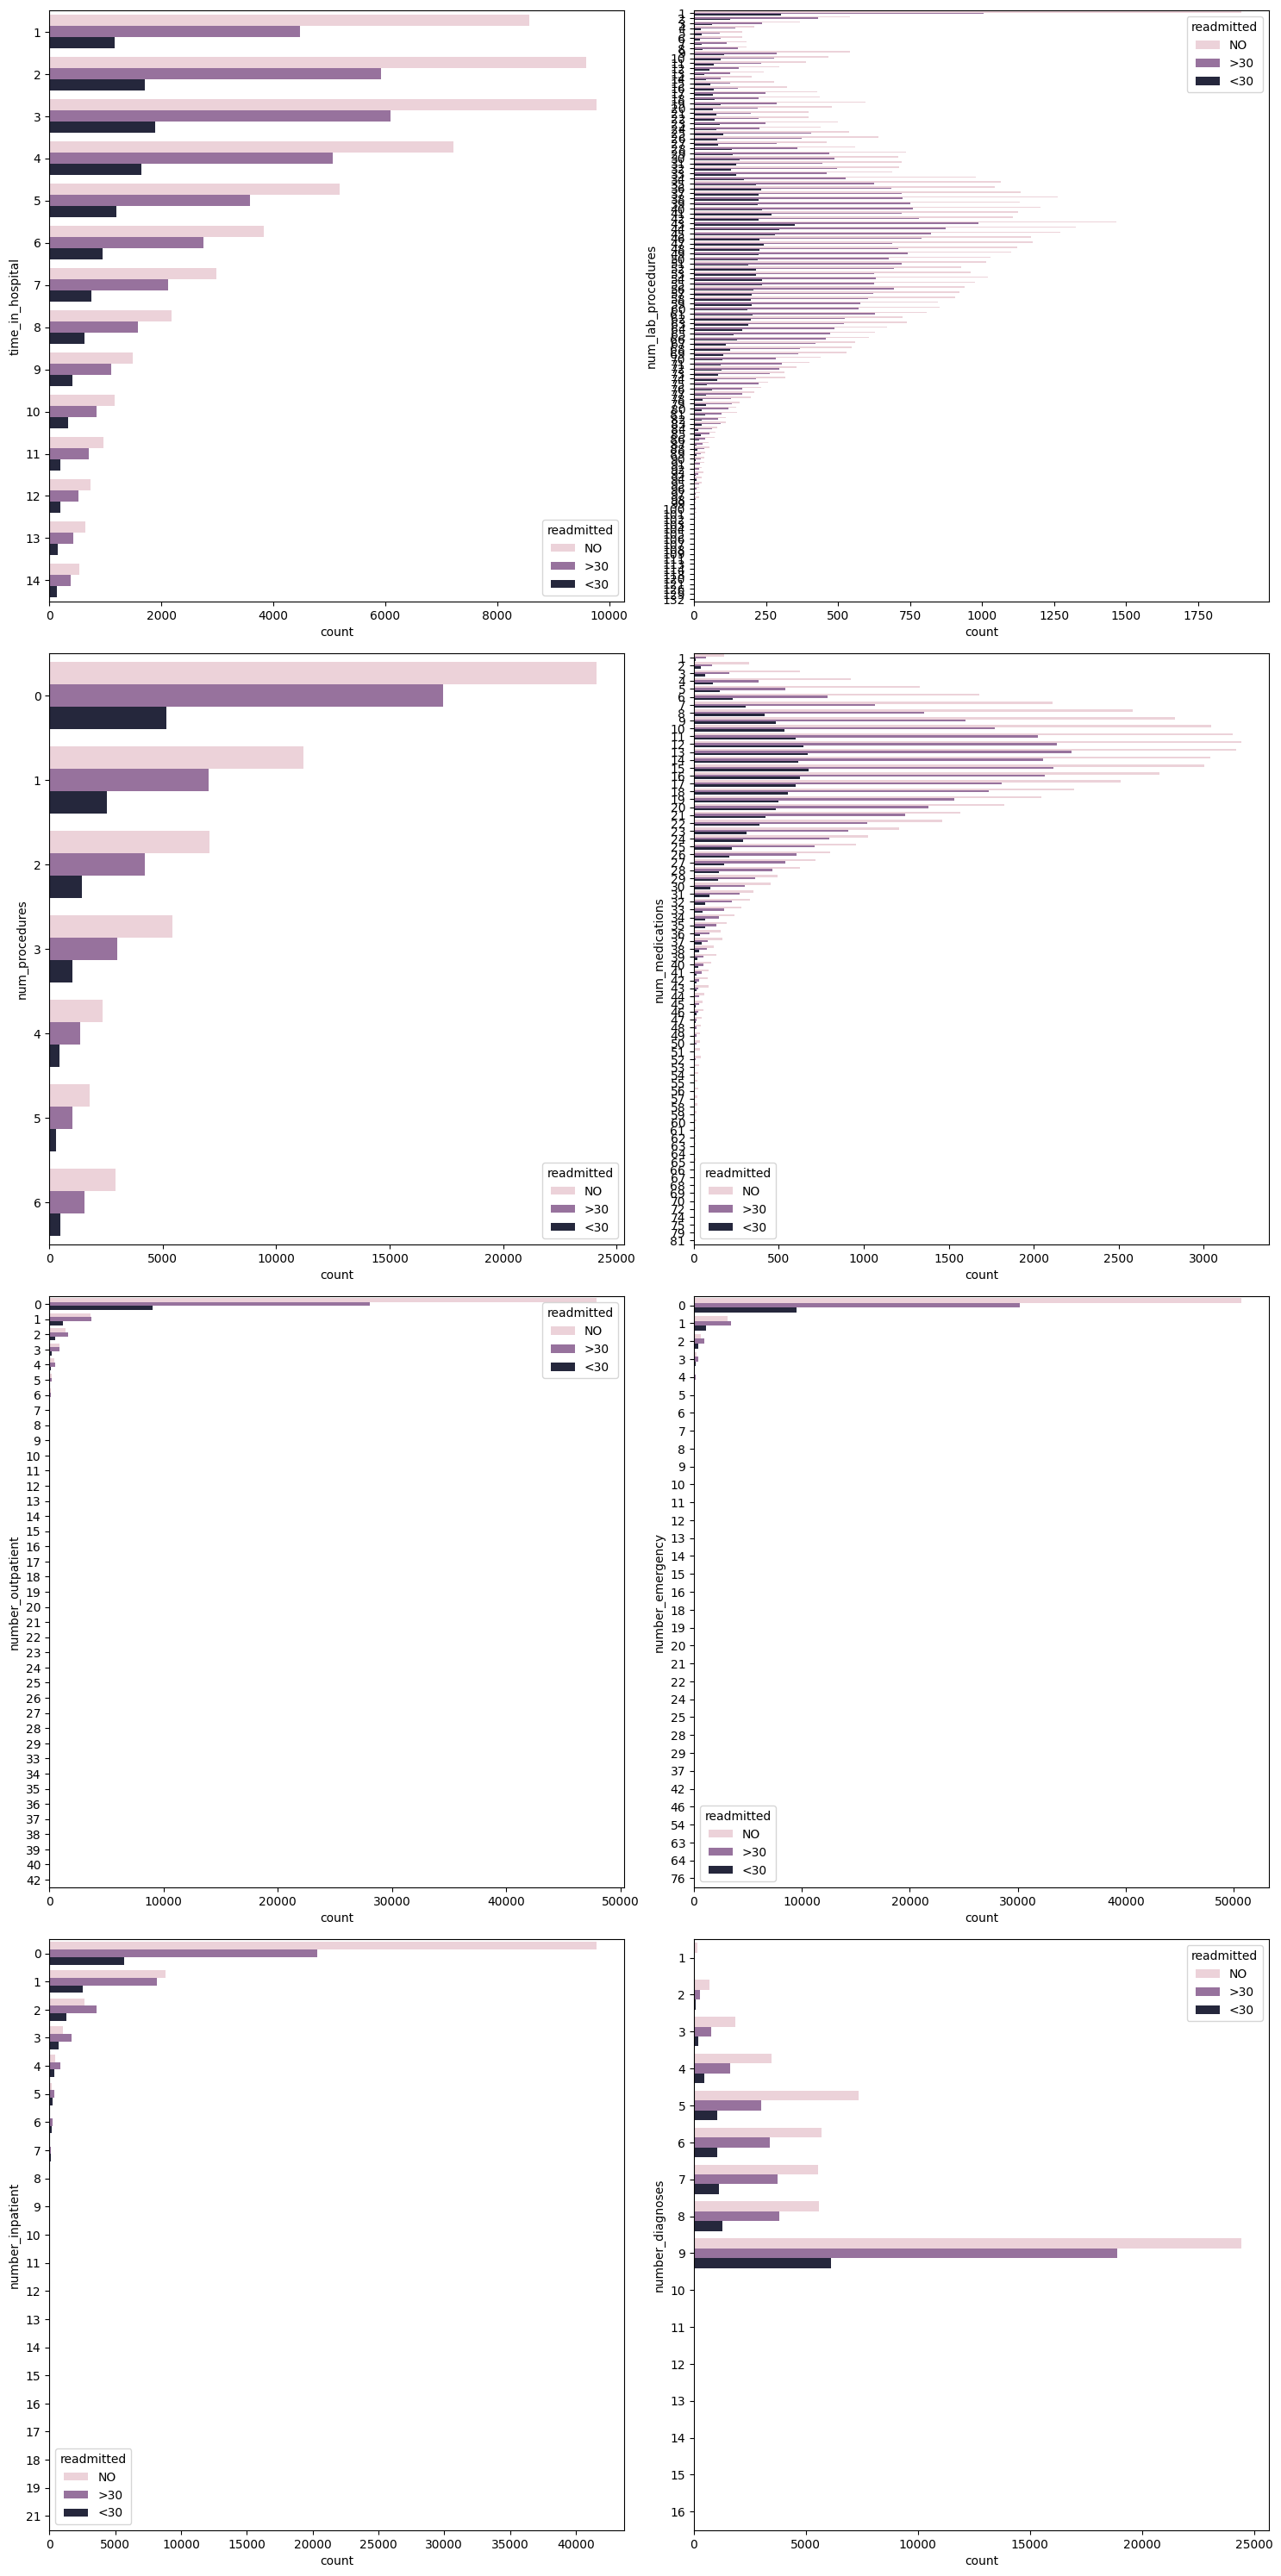

In [38]:
df_no_id = df.drop(['encounter_id', 'patient_nbr'], axis=1)
int_columns = df_no_id.select_dtypes(include = ['int64']).columns
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 30))

for i, column in enumerate(int_columns):
    row_id = math.floor(i/2)
    col_id = i % 2
    sns.countplot(data = df_no_id, y = column, hue = 'readmitted', ax = axes[row_id, col_id], palette = 'ch:-.24')

plt.tight_layout()
plt.show()

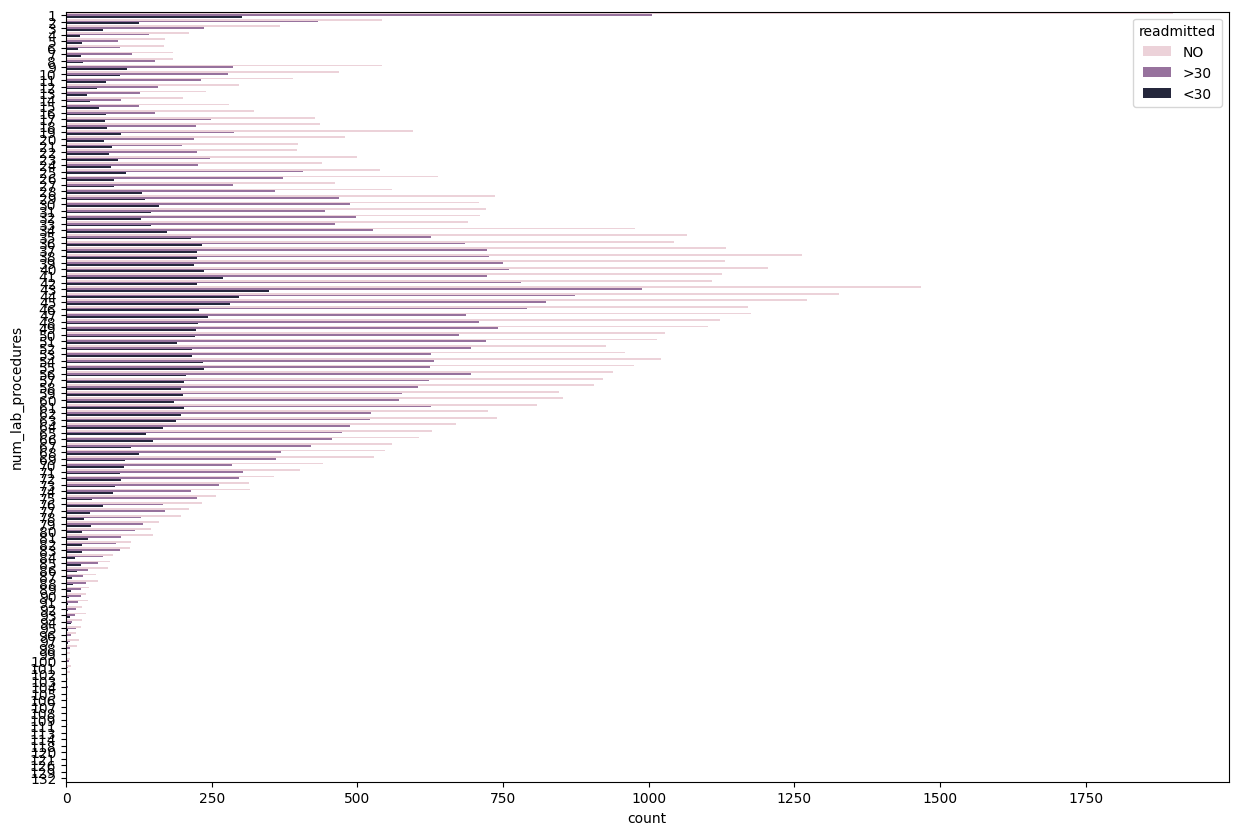

In [46]:
plt.subplots(figsize=(15, 10))
sns.countplot(y = 'num_lab_procedures', hue = 'readmitted', data = df, palette = 'ch:-.24');
plt.show()

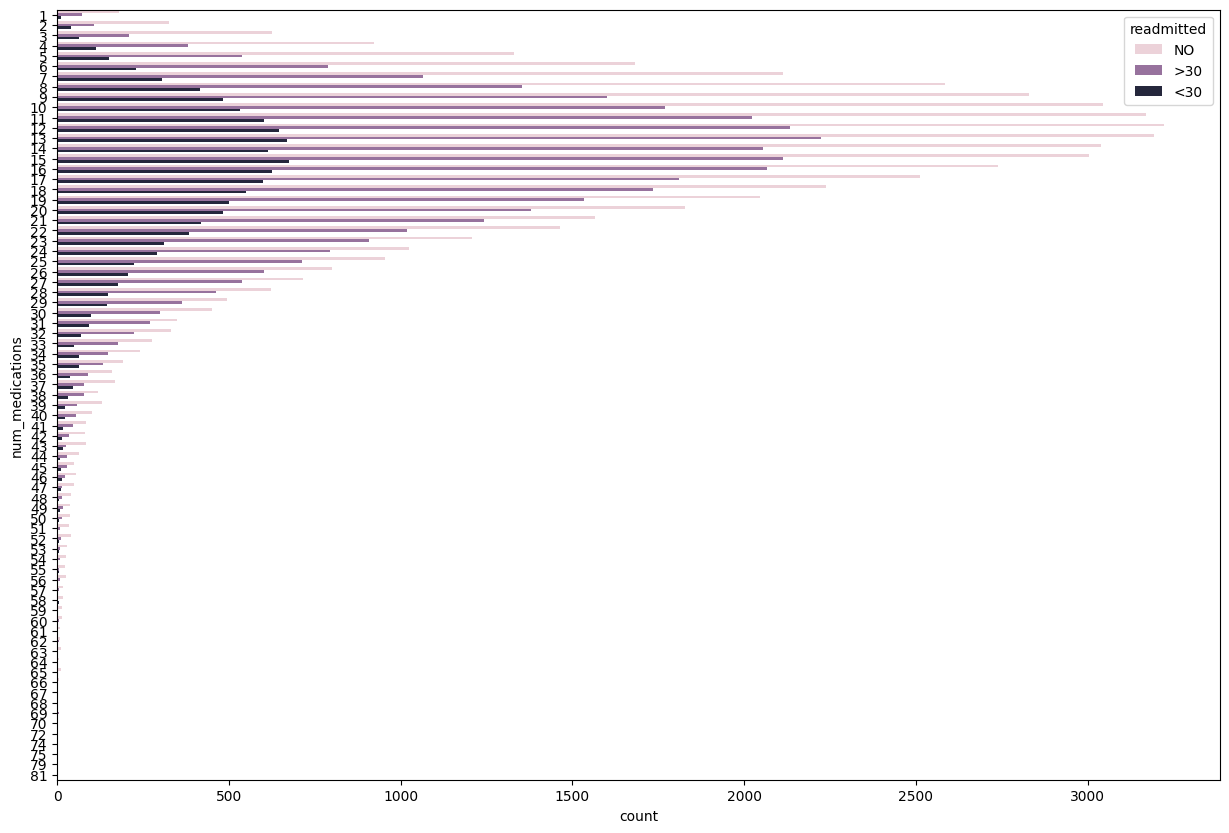

In [47]:
plt.subplots(figsize=(15, 10))
sns.countplot(y = 'num_medications', hue = 'readmitted', data = df, palette = 'ch:-.24');
plt.show()

In [ ]:
plt.subplots(figsize=(15, 20))
sns.countplot(y = 'num_medications', hue = 'readmitted', data = df, palette = 'ch:-.24');
plt.show()

In [ ]:
df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

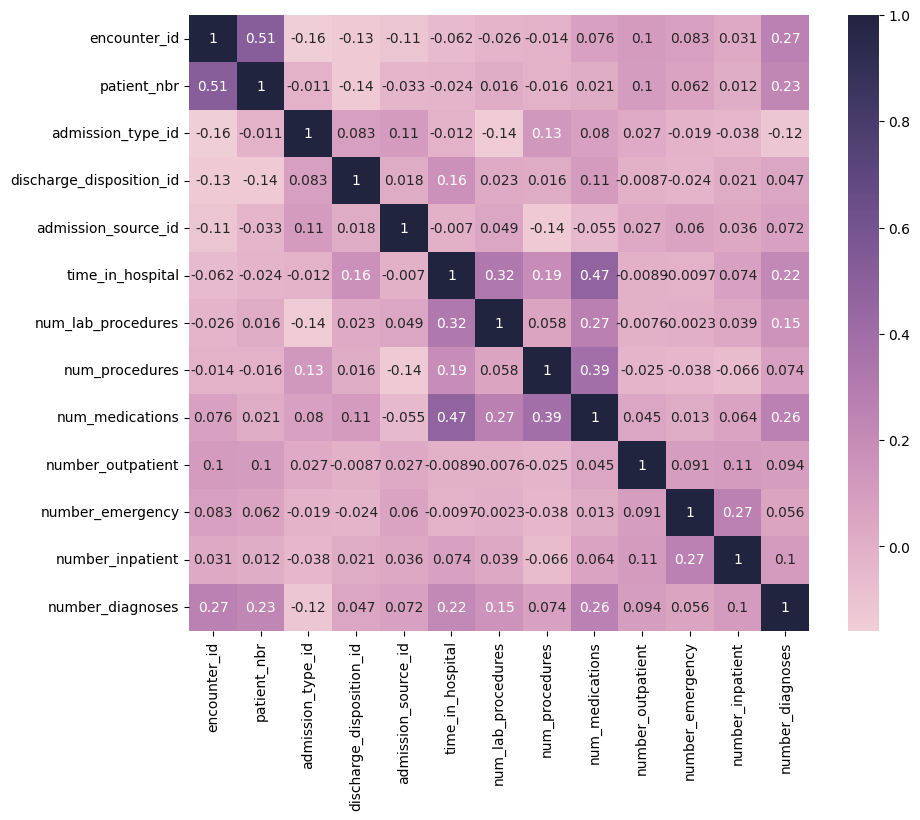

In [ ]:
cmap = sns.color_palette('ch:-.24', as_cmap=True)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.select_dtypes('int64').corr(), ax = ax, cmap=cmap, annot = True)
plt.show()

In [ ]:
df['number_visits'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [ ]:
num_cols = [] #
stat_df = pd.DataFrame()
stat_df['num_col'] = num_cols

skew_before, skew_after = [], []
kurt_before, kurt_after = [], []
std_before, std_after = [], []

log_needed = []

for col in num_cols:
    skew_val = df[col].skew()
    kurt_val = df[col].kurtosis()
    std_val = df[col].std()

    skew_before.append(skew_val)
    kurt_before.append(kurt_val)
    std_before.append(std_val)

    if abs(skew_before) > 2:
        df[col] = np.log1p(df[col])
        skew_val = df[col].skew()
        kurt_val = df[col].kurtosis()
        std_val = df[col].std()
        log_needed.append("Yes")
    else:
        log_needed.append("No")

    skew_after.append(skew_val)
    kurt_after.append(kurt_val)
    std_after.append(std_val)


stat_df['skew_before'], stat_df['skew_after'] = skew_before, skew_after
stat_df['kurt_before'], stat_df['kurt_after'] = kurt_before, kurt_after
stat_df['std_before'], stat_df['std_after'] = std_before, std_after
stat_df['log_needed'] = log_needed

stat_df

In [ ]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

##Data Preprocessing

##Model Training